# Assignment


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_car = pd.read_csv("C:/Users/works/Desktop/Tech stack/projects-20230901T120436Z-001/projects/BA/carprice.csv")

In [5]:
df_car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950.0
1,0,peugeot 504,gas,std,four,wagon,rwd,front,114.2,198.9,...,120,mpfi,3.46,2.19,8.4,95,5000.0,19.0,24.0,16695.0
2,3,mitsubishi outlander,gas,turbo,two,hatchback,fwd,front,95.9,173.2,...,156,spdi,3.58,3.86,7.0,145,5000.0,19.0,24.0,12629.0
3,1,toyota corona,gas,std,two,hatchback,fwd,front,95.7,158.7,...,92,2bbl,3.05,3.03,9.0,62,4800.0,31.0,38.0,6338.0
4,2,toyota cressida,gas,std,two,convertible,rwd,front,98.4,176.2,...,146,mpfi,3.62,3.50,9.3,116,NaN,24.0,30.0,17669.0


# Question 
Give me some insights from this data. (Totally open ended, dazzle me with your brilliance ^_^ )

Find me something meaningful that will help me as a business owner. 

![](https://media.giphy.com/media/3oEjHAWsCGowjkc3Ha/giphy.gif)

# EDA

In [6]:
df_car.shape

(153, 25)

In [7]:
#inserting a new column "company" 
Company = df_car["CarName"].apply(lambda x : x.split(" ")[0])
df_car.insert(0, "Company", Company)
df_car.head()

,Company,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,audi,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950.0
1,peugeot,0,peugeot 504,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,2.19,8.4,95,5000.0,19.0,24.0,16695.0
2,mitsubishi,3,mitsubishi outlander,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.58,3.86,7.0,145,5000.0,19.0,24.0,12629.0
3,toyota,1,toyota corona,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800.0,31.0,38.0,6338.0
4,toyota,2,toyota cressida,gas,std,two,convertible,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116,NaN,24.0,30.0,17669.0


In [8]:
df_car.Company.unique()

array(['audi', 'peugeot', 'mitsubishi', 'toyota', 'subaru', 'porsche',
       'volvo', 'maxda', 'jaguar', 'mazda', 'bmw', 'volkswagen', 'nissan',
       'honda', 'alfa-romero', 'dodge', 'porcshce', 'vokswagen',
       'toyouta', 'buick', 'chevrolet', 'plymouth', 'mercury', 'saab',
       'renault', 'isuzu', 'Nissan'], dtype=object)

# Visualizations and analysis

C:\Users\works\AppData\Local\Temp\ipykernel_24828\97248902.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_car.price)


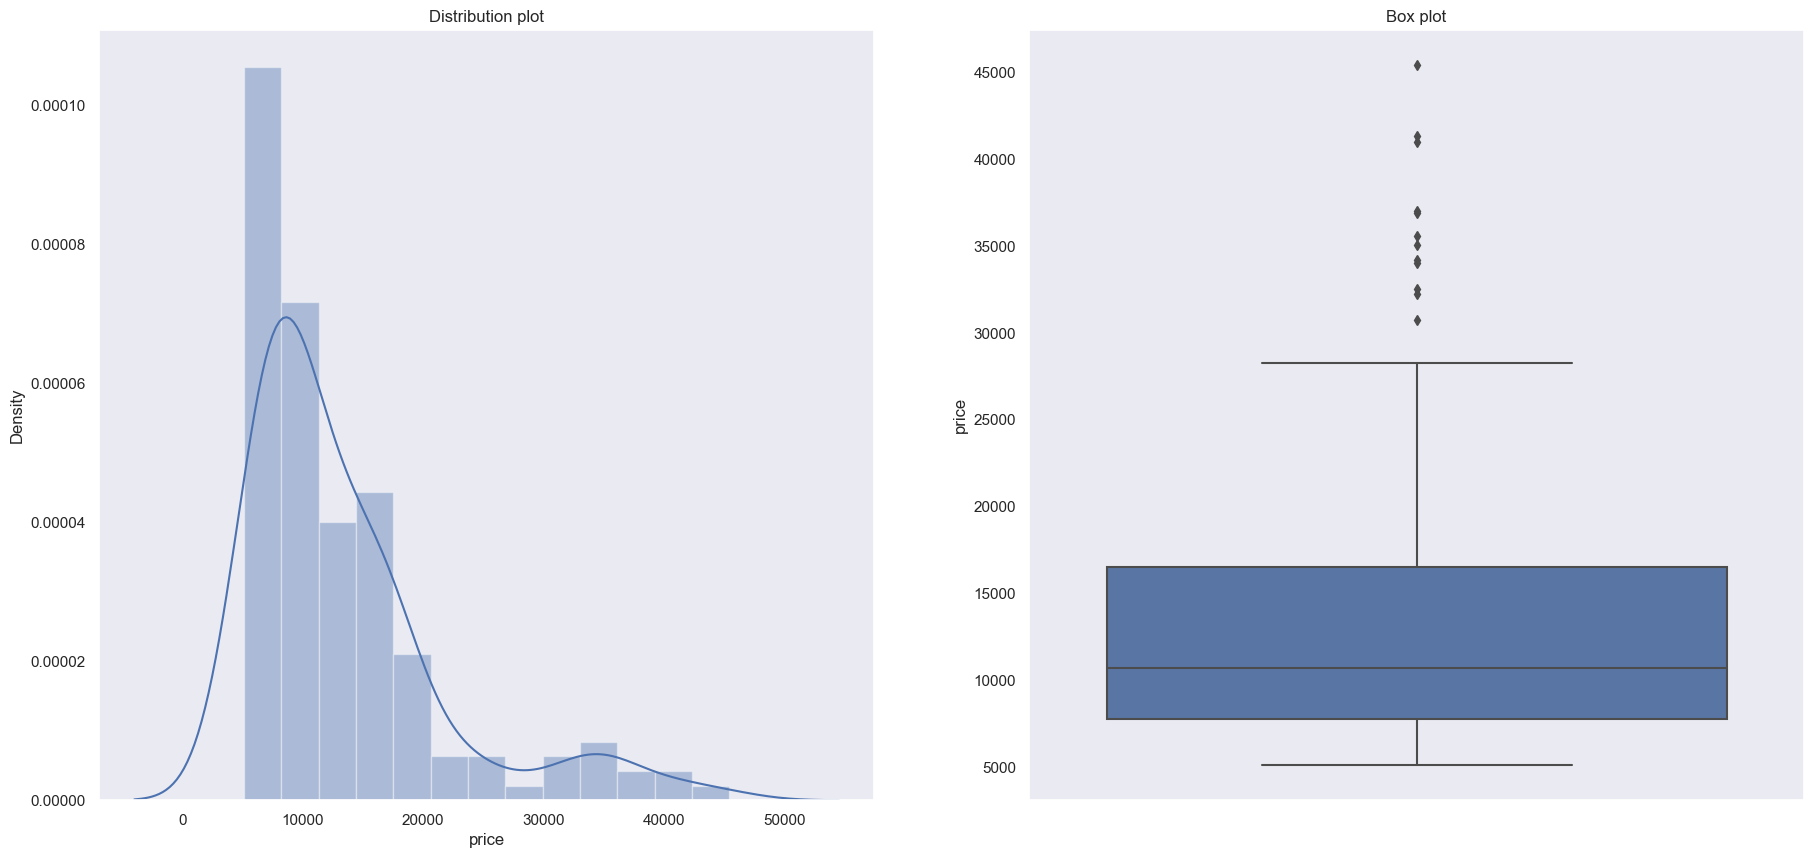

In [9]:
plt.figure(figsize=(22,10))
sns.set(style="dark") 

plt.subplot(1,2,1)
plt.title("Distribution plot")
sns.distplot(df_car.price)

plt.subplot(1,2,2)
plt.title("Box plot")
sns.boxplot(y=df_car.price);


In [10]:
df_car.price.describe(percentiles= [0.25,0.50,0.75,0.9,1])

count      153.000000
mean     13364.157954
std       8302.558158
min       5118.000000
25%       7775.000000
50%      10698.000000
75%      16500.000000
90%      23625.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

### Most of the car prices are low (i.e below 15000)

### High variance in the car price (15% of the price are between 18500 and 45400)


# ---------------------------------------------------------------------------------------------------------------

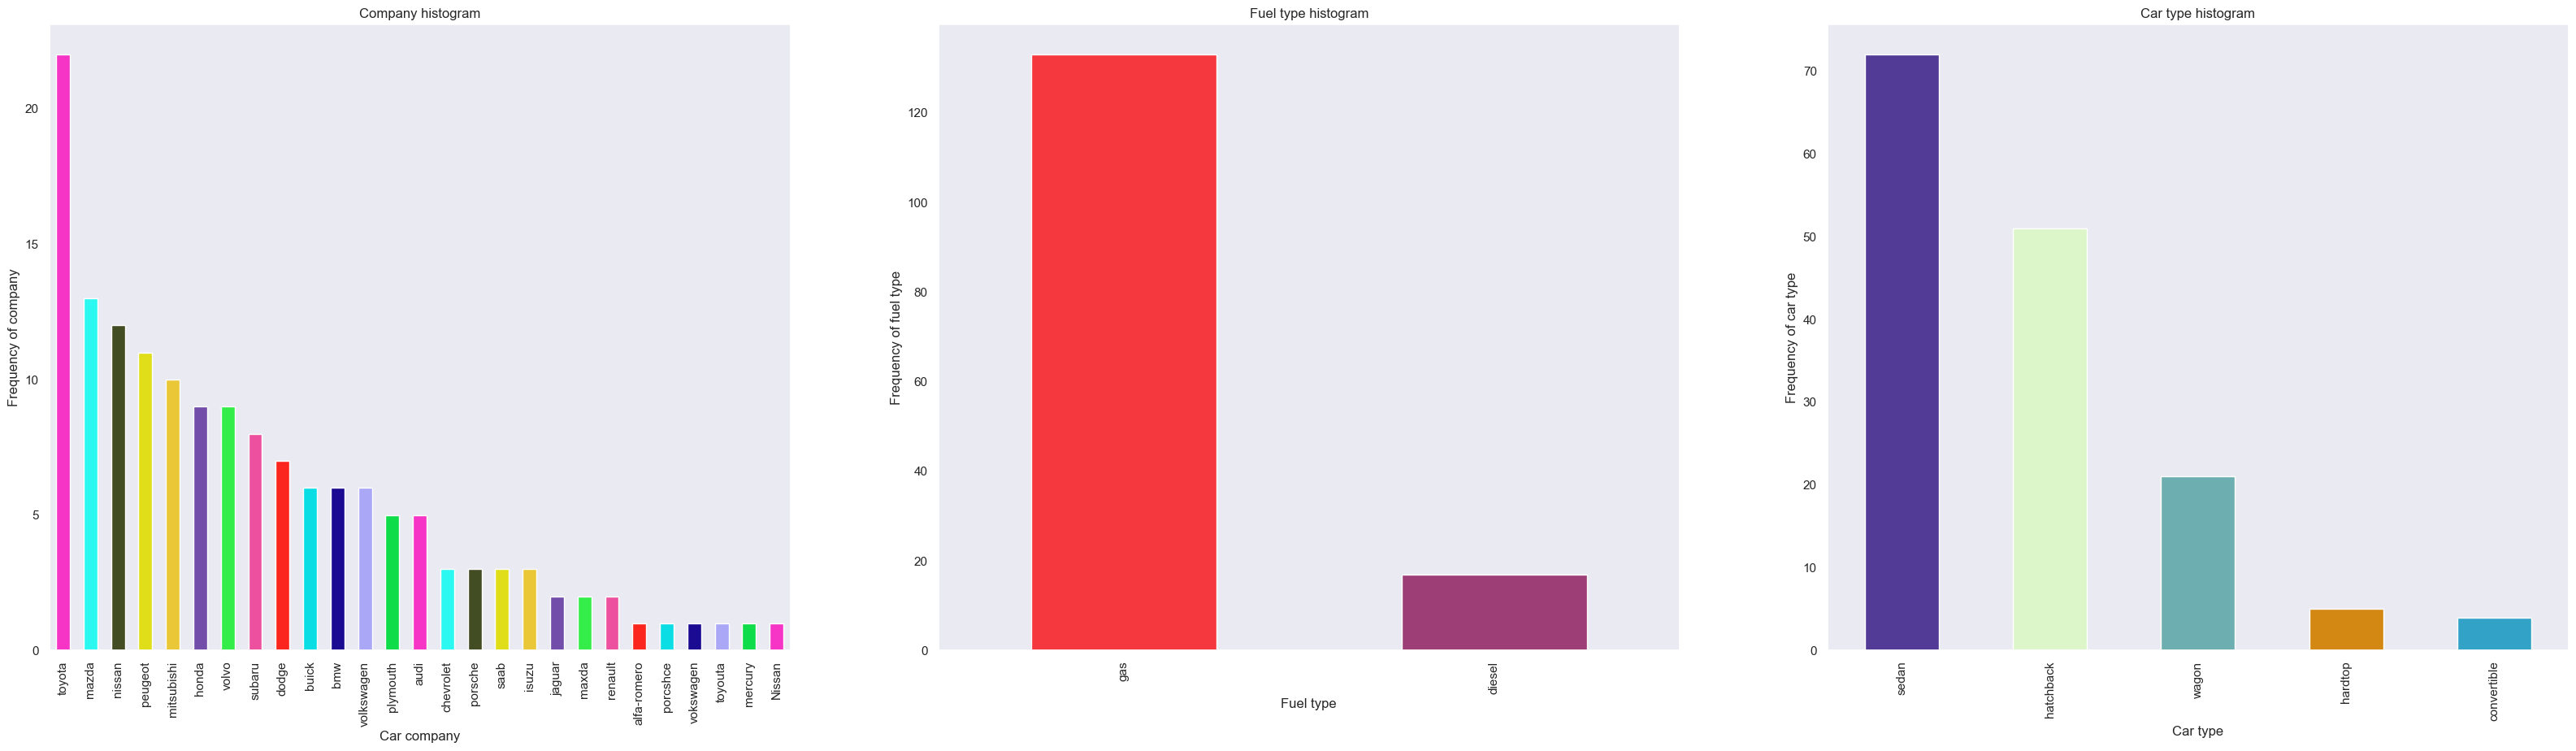

In [11]:
plt.figure(figsize= (40,10))

colors = np.random.rand(len(df_car.Company.value_counts().unique()),3)
plt.subplot(1,3,1)
plt1 = df_car.Company.value_counts().plot(kind="bar", color=colors)
plt.title("Company histogram")
plt1.set(xlabel= "Car company", ylabel= "Frequency of company")

colors = np.random.rand(2,3)
plt.subplot(1,3,2)
plt2= df_car.fueltype.value_counts().plot(kind="bar", color=colors)
plt.title("Fuel type histogram")
plt2.set(xlabel="Fuel type", ylabel="Frequency of fuel type")

colors = np.random.rand(5,3)
plt.subplot(1,3,3)
plt3= df_car.carbody.value_counts().plot(kind="bar", color=colors)
plt.title("Car type histogram")
plt3.set(xlabel ="Car type", ylabel="Frequency of car type");

### Toyota is the most frequent company

### Number of gas fueled cars are more than diesel

### Sedan is the top car prefered

# ---------------------------------------------------------------------------------------------------------------

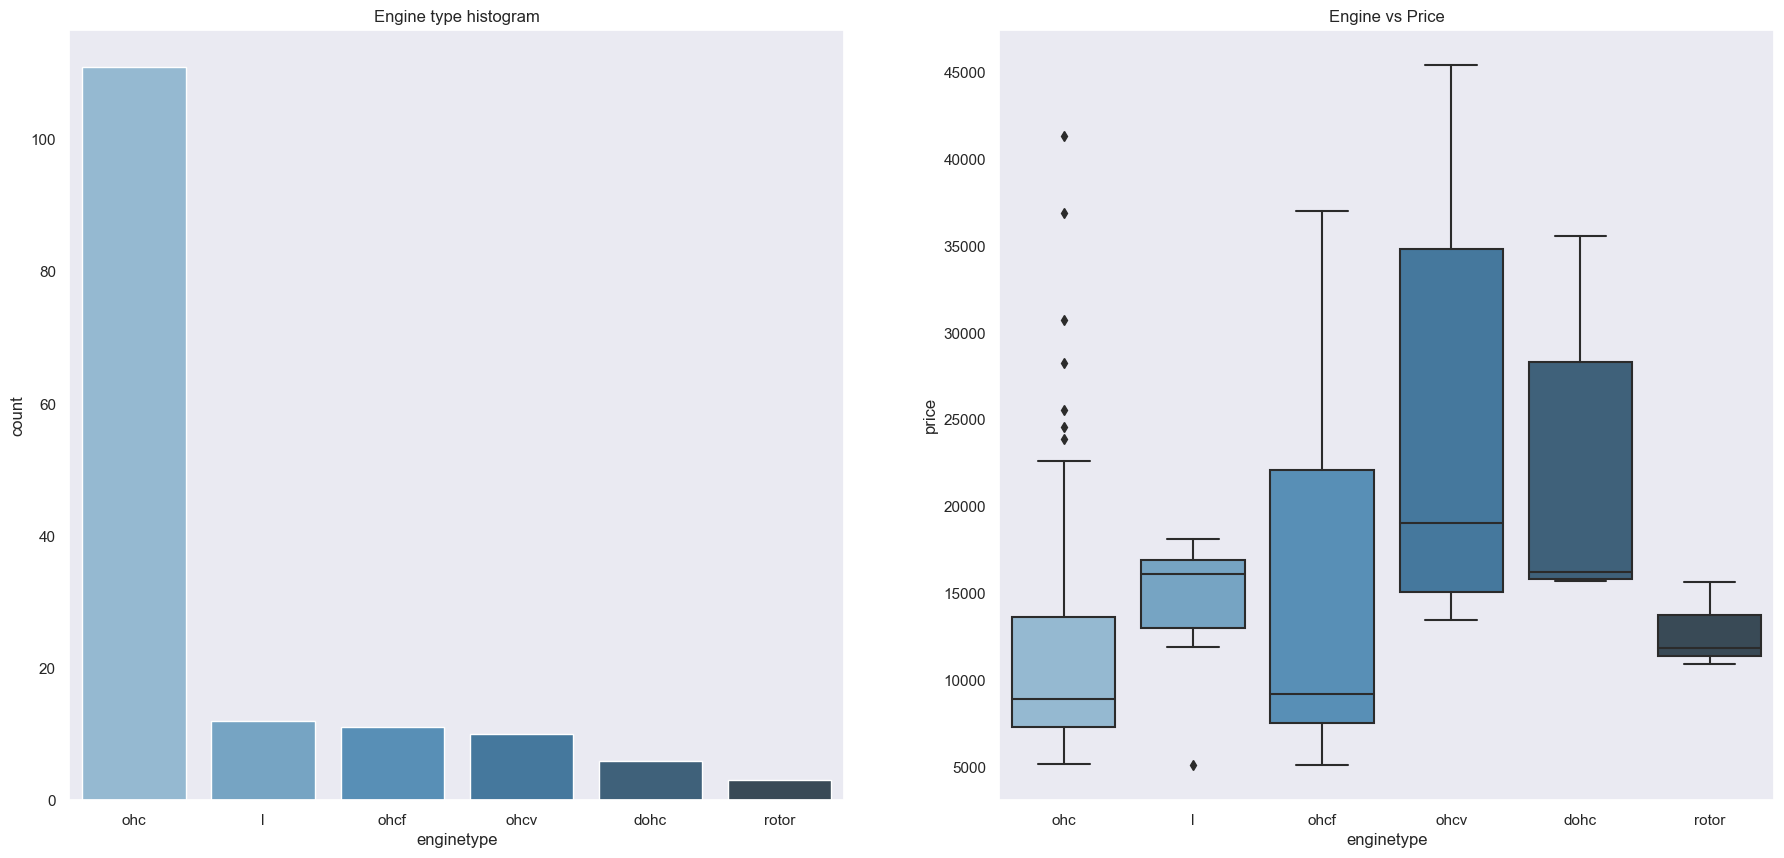

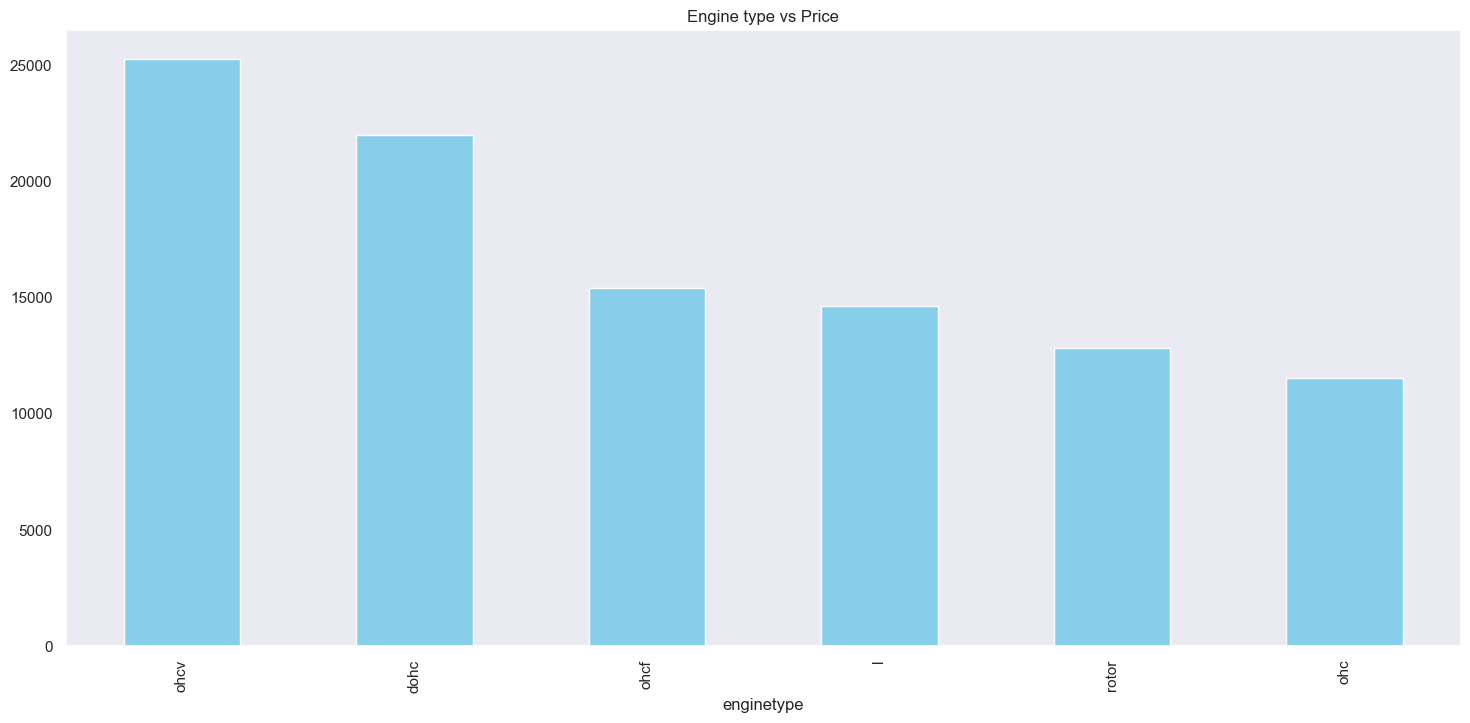

In [13]:
df_car['enginetype'] = df_car['enginetype'].astype('category')

plt.figure(figsize=(22, 10))

plt.subplot(1, 2, 1)
plt.title("Engine type histogram")
sns.countplot(data=df_car, x='enginetype', palette="Blues_d", order=df_car['enginetype'].value_counts().index)

plt.subplot(1, 2, 2)
plt.title("Engine vs Price")
sns.boxplot(data=df_car, x='enginetype', y='price', palette="Blues_d", order=df_car['enginetype'].value_counts().index)

df = df_car.groupby(["enginetype"])["price"].mean().sort_values(ascending=False)
plt.figure(figsize=(18, 8))
df.plot(kind='bar', color='skyblue')
plt.title("Engine type vs Price")
plt.show()

### ohc Engine type seems to be the most favored

### ohcv has the highest price range, ohc and ohcf have the below price range

# ---------------------------------------------------------------------------------------------------------------

<Figure size 3000x1000 with 0 Axes>

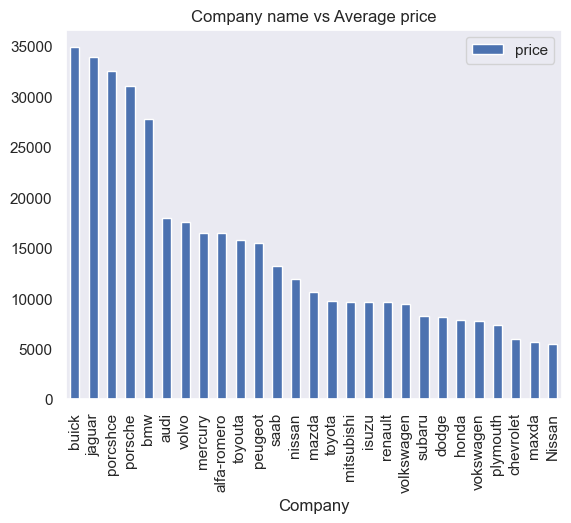

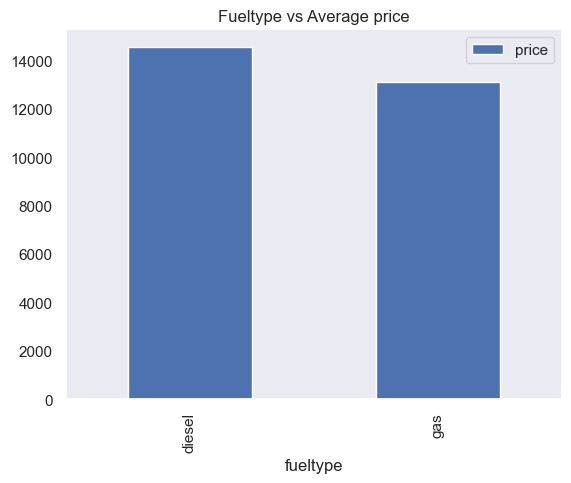

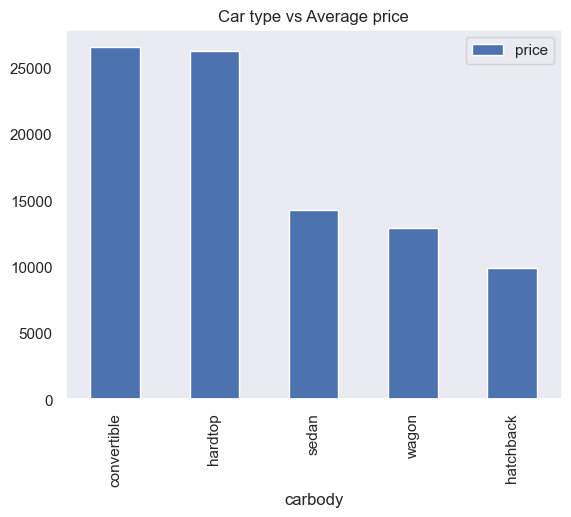

In [14]:
plt.figure(figsize=(30,10))

df= pd.DataFrame(df_car.groupby(["Company"])["price"].mean().sort_values(ascending=False))
df.plot.bar()
plt.title("Company name vs Average price")

df= pd.DataFrame(df_car.groupby(["fueltype"])["price"].mean().sort_values(ascending=False))
df.plot.bar()
plt.title("Fueltype vs Average price")

df= pd.DataFrame(df_car.groupby(["carbody"])["price"].mean().sort_values(ascending=False))
df.plot.bar()
plt.title("Car type vs Average price");

### Jaguar and Buick have the highest average price

### Diesel has higher average price than gas

### Hardtop and Convertible have higher average price

# ---------------------------------------------------------------------------------------------------------------